In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is version 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.0.1
3.1


In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(2)

In [5]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [6]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [7]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over at 0x150aeb2e0>)
ScalarOutcome('Dike Investment Costs', variable_name=('A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs'), function=<function sum_over at 0x150aeb2e0>)
ScalarOutcome('RfR Investment Costs', variable_name=('RfR Total Costs',), function=<function sum_over at 0x150aeb2e0>)
ScalarOutcome('Evacuation Costs', variable_name=('Expected Evacuation Costs',), function=<function sum_over at 0x150aeb2e0>)
ScalarOutcome('Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'), function=<function sum_over at 0x150

In [8]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

[MainProcess/INFO] pool started with 10 workers
[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [00:04<00:00, 45.50it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [9]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,0,305.990112,10.0,0.721178,291.495430,10.0,0.928566,42.658442,10.0,0.544166,...,3,10,0,2,8,1,4,4,0,dikesnet
1,51,118.635139,1.0,0.495952,175.412561,1.5,0.004359,321.995494,10.0,0.825575,...,3,10,0,2,8,1,4,5,0,dikesnet
2,11,222.844370,1.0,0.110526,47.662678,1.0,0.758142,31.806270,1.5,0.794066,...,3,10,0,2,8,1,4,6,0,dikesnet
3,128,315.137486,1.0,0.094118,236.022447,10.0,0.562436,146.899922,1.0,0.105501,...,3,10,0,2,8,1,4,7,0,dikesnet
4,69,146.772629,1.0,0.989531,212.161732,10.0,0.736434,177.240143,10.0,0.070373,...,3,10,0,2,8,1,4,8,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,74,234.548979,1.5,0.507232,327.270190,1.0,0.950071,286.714709,1.5,0.014651,...,9,3,10,6,6,3,1,49,3,dikesnet
196,121,52.127308,10.0,0.809071,334.788455,10.0,0.160102,81.620282,1.5,0.094808,...,9,3,10,6,6,3,1,50,3,dikesnet
197,98,179.410899,1.5,0.056310,319.933258,1.5,0.703057,247.716897,10.0,0.252338,...,9,3,10,6,6,3,1,51,3,dikesnet
198,62,262.144887,10.0,0.334622,284.095054,10.0,0.490722,68.898699,10.0,0.154853,...,9,3,10,6,6,3,1,52,3,dikesnet


In [10]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,0.000000e+00,7.205797e+08,1.790500e+09,0.000000,0.000000
1,0.000000e+00,7.205797e+08,1.790500e+09,0.000000,0.000000
2,0.000000e+00,7.205797e+08,1.790500e+09,0.000000,0.000000
3,4.406491e+06,7.205797e+08,1.790500e+09,244.660988,0.000360
4,3.166955e+07,7.205797e+08,1.790500e+09,2975.708414,0.004077
...,...,...,...,...,...
195,3.602819e+07,5.095858e+08,9.589000e+08,1170.808734,0.033970
196,6.942084e+06,5.095858e+08,9.589000e+08,144.707486,0.004384
197,0.000000e+00,5.095858e+08,9.589000e+08,0.000000,0.000000
198,0.000000e+00,5.095858e+08,9.589000e+08,0.000000,0.000000


In [11]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "All RfR",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1,
               "1_RfR 0": 1, "1_RfR 1": 1, "1_RfR 2": 1,
               "2_RfR 0": 1, "2_RfR 1": 1, "2_RfR 2": 1,
               "3_RfR 0": 1, "3_RfR 1": 1, "3_RfR 2": 1,
               "4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1,}
        )
    ),
    Policy(
        "No RfR",
        **dict(
            get_do_nothing_dict(),
            **{

            }
        )
    ),
]

In [12]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 10 workers
[MainProcess/INFO] performing 100 scenarios * 2 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [00:03<00:00, 54.10it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [13]:
experiments, outcomes = results

In [14]:
# only works because we have scalar outcomes
outcomes_df = pd.DataFrame(outcomes)
outcomes_df

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,3.586099e+07,0,2.131200e+09,0.0,0.025461
1,3.847347e+07,0,2.131200e+09,0.0,0.036899
2,1.169291e+08,0,2.131200e+09,0.0,0.109543
3,7.984350e+08,0,2.131200e+09,0.0,0.527393
4,6.578463e+07,0,2.131200e+09,0.0,0.059045
...,...,...,...,...,...
195,1.358771e+09,0,0.000000e+00,0.0,1.057076
196,4.346188e+09,0,0.000000e+00,0.0,5.057059
197,4.350917e+08,0,0.000000e+00,0.0,0.502320
198,1.227231e+09,0,0.000000e+00,0.0,1.674458


In [15]:
outcomes_df["policies"] = experiments.policy
outcomes_df


,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policies
0,3.586099e+07,0,2.131200e+09,0.0,0.025461,All RfR
1,3.847347e+07,0,2.131200e+09,0.0,0.036899,All RfR
2,1.169291e+08,0,2.131200e+09,0.0,0.109543,All RfR
3,7.984350e+08,0,2.131200e+09,0.0,0.527393,All RfR
4,6.578463e+07,0,2.131200e+09,0.0,0.059045,All RfR
...,...,...,...,...,...,...
195,1.358771e+09,0,0.000000e+00,0.0,1.057076,No RfR
196,4.346188e+09,0,0.000000e+00,0.0,5.057059,No RfR
197,4.350917e+08,0,0.000000e+00,0.0,0.502320,No RfR
198,1.227231e+09,0,0.000000e+00,0.0,1.674458,No RfR


In [16]:
#to_plot = outcomes_df.columns.tolist()[6:]
#to_plot

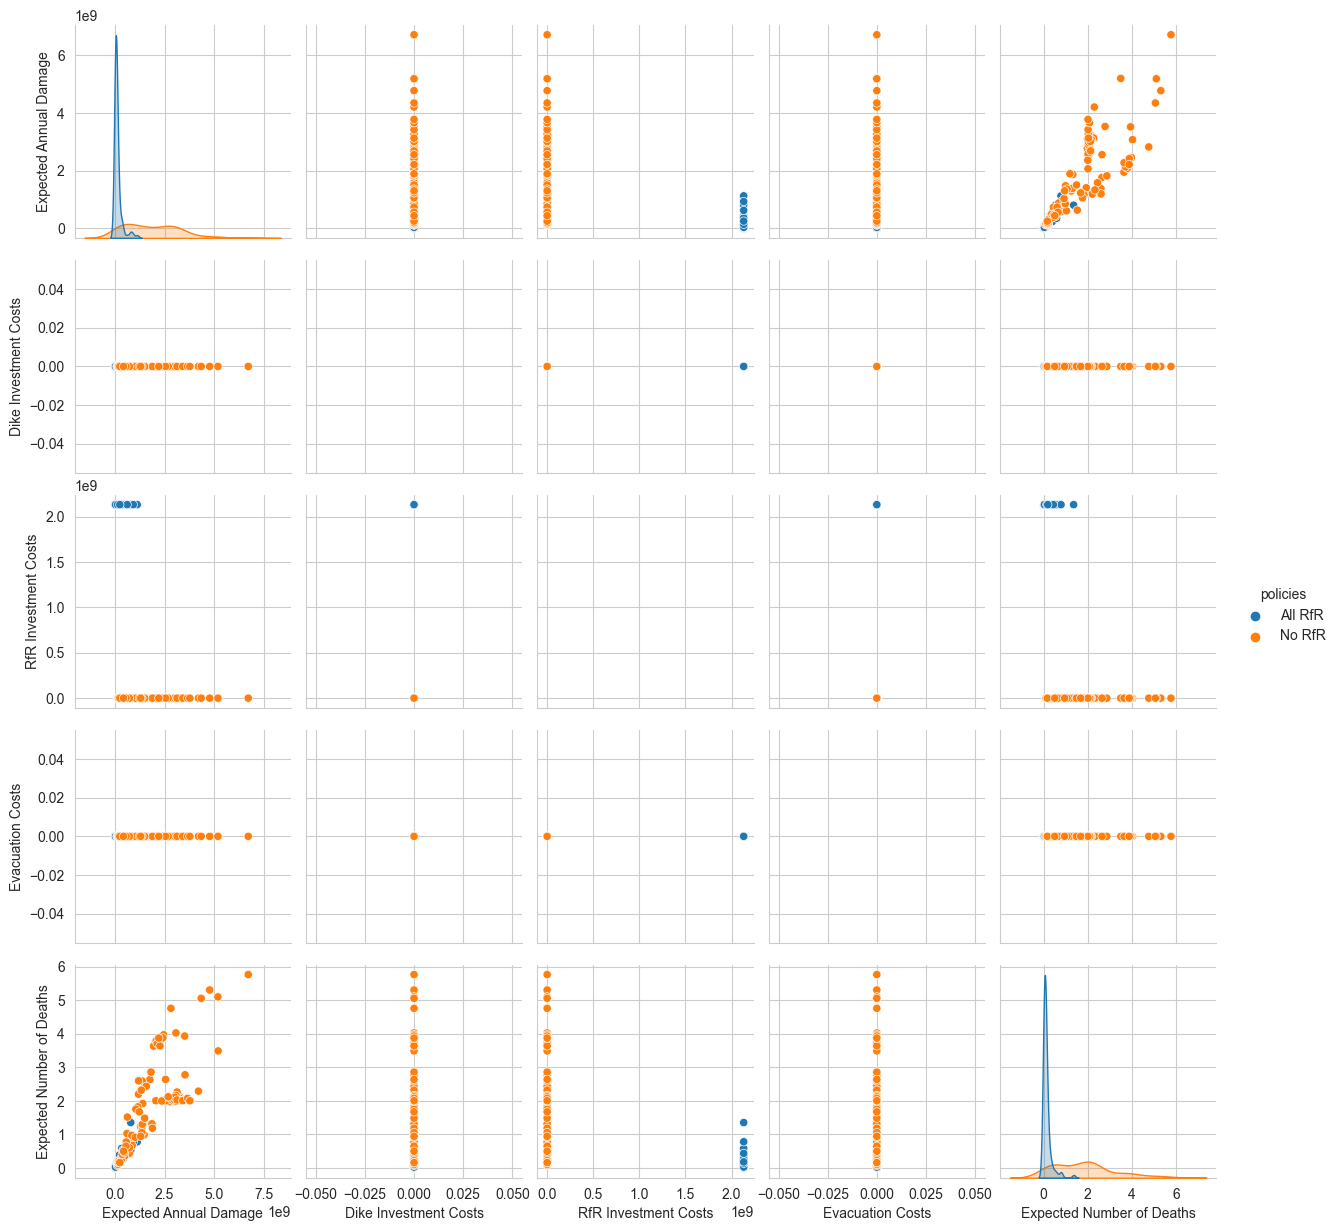

In [17]:
import seaborn

seaborn.pairplot(outcomes_df, hue="policies")
plt.show()